# Análise de Dados de Logística
## 1. Introdução
Este notebook tem como objetivo realizar uma análise exploratória de dados (EDA) em um conjunto de dados de logística. A análise visa identificar padrões, tendências e insights que possam otimizar as operações de transporte e entrega.

### Descrição da Base de Dados
A base de dados contém informações sobre viagens de transporte, incluindo detalhes como provedor de GPS, IDs de reserva, locais de origem e destino, datas e horários de viagem, tipo de veículo, distância percorrida, status de entrega (no prazo ou atrasado), e informações sobre clientes e fornecedores

### 1.2 Objetivos da Análise
- Compreender a distribuição das variáveis chave, como distância de transporte, duração da viagem e status de entrega.
- Identificar outliers e anomalias nos dados que possam impactar a eficiência das operações.
- Explorar correlações entre variáveis para entender fatores que influenciam atrasos nas entregas.
- Visualizar os dados de forma clara e informativa para facilitar a interpretação dos resultados.
- Fornecer insights acionáveis para melhorar a logística e o planejamento de rotas.
- Preparar os dados para análises futuras, como modelagem preditiva ou otimização de rotas.


### 1.3 metodos core do projeto

In [121]:
def save_base_cleaned(df, nome_base="base_limpa", pasta="."):
    arquivos = [f for f in os.listdir(pasta) if f.startswith(nome_base) and f.endswith(".csv")]

    if not arquivos:
        novo_num = 1
    else:
        nums = [int(f.replace(".csv", "").split("_")[-1]) for f in arquivos]
        novo_num = max(nums) + 1

    nome_arquivo = os.path.join(pasta, f"{nome_base}_{novo_num}.csv")
    df.to_csv(nome_arquivo, index=False)

## 2. Carregamento e Pré-processamento de Dados

### 2.1 imports

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import kagglehub


### 2.2 Carregamento dos Dados

In [123]:
path = kagglehub.dataset_download("nicolemachado/transportation-and-logistics-tracking-dataset")
excel_path = os.path.join(path, "Transportation and Logistics Tracking Dataset..xlsx")
df = pd.read_excel(excel_path,sheet_name='Primary data')
df

### 2.3 informações do dataframe

In [108]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6880 entries, 0 to 6879
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   GpsProvider                         5927 non-null   object        
 1   BookingID                           6880 non-null   object        
 2   Market/Regular                      6880 non-null   object        
 3   BookingID_Date                      6880 non-null   datetime64[ns]
 4   vehicle_no                          6880 non-null   object        
 5   Origin_Location                     6880 non-null   object        
 6   Destination_Location                6880 non-null   object        
 7   Org_lat_lon                         6880 non-null   object        
 8   Des_lat_lon                         6880 non-null   object        
 9   Data_Ping_time                      5927 non-null   datetime64[ns]
 10  Planned_ETA             

GpsProvider                            953
BookingID                                0
Market/Regular                           0
BookingID_Date                           0
vehicle_no                               0
Origin_Location                          0
Destination_Location                     0
Org_lat_lon                              0
Des_lat_lon                              0
Data_Ping_time                         953
Planned_ETA                              0
Current_Location                       964
DestinationLocation                      0
actual_eta                              37
Curr_lat                               953
Curr_lon                               953
ontime                                4332
delay                                 2538
OriginLocation_Code                      3
DestinationLocation_Code                27
trip_start_date                          0
trip_end_date                          194
TRANSPORTATION_DISTANCE_IN_KM          712
vehicleType

### 2.4 tratando dados ausentes

In [109]:

colunas_nulas = df.columns[df.isnull().any() & ~df.columns.isin(['delay', 'ontime'])].tolist()

for col in colunas_nulas:
    if df[col].dtype == 'object':
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
    elif df[col].dtype in ['int64', 'float64']:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

print(df.isnull().sum())



GpsProvider                              0
BookingID                                0
Market/Regular                           0
BookingID_Date                           0
vehicle_no                               0
Origin_Location                          0
Destination_Location                     0
Org_lat_lon                              0
Des_lat_lon                              0
Data_Ping_time                         953
Planned_ETA                              0
Current_Location                         0
DestinationLocation                      0
actual_eta                               0
Curr_lat                                 0
Curr_lon                                 0
ontime                                4332
delay                                 2538
OriginLocation_Code                      0
DestinationLocation_Code                 0
trip_start_date                          0
trip_end_date                            0
TRANSPORTATION_DISTANCE_IN_KM            0
vehicleType

### 2.5 tratando dados de data

In [110]:

# Converter colunas de data para o tipo datetime
date_cols = ['BookingID_Date', 'Planned_ETA', 'actual_eta', 'trip_start_date', 'trip_end_date']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
df.info()
df['trip_duration_hours'] = (df['actual_eta'] - df['trip_start_date']).dt.total_seconds() / 3600


df['trip_duration_hours'] = (df['actual_eta'] - df['trip_start_date']).dt.total_seconds() / 3600
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6880 entries, 0 to 6879
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   GpsProvider                         6880 non-null   object        
 1   BookingID                           6880 non-null   object        
 2   Market/Regular                      6880 non-null   object        
 3   BookingID_Date                      6880 non-null   datetime64[ns]
 4   vehicle_no                          6880 non-null   object        
 5   Origin_Location                     6880 non-null   object        
 6   Destination_Location                6880 non-null   object        
 7   Org_lat_lon                         6880 non-null   object        
 8   Des_lat_lon                         6880 non-null   object        
 9   Data_Ping_time                      5927 non-null   datetime64[ns]
 10  Planned_ETA             

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Data_Ping_time,...,vehicleType,Minimum_kms_to_be_covered_in_a_day,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped,trip_duration_hours
0,CONSENT TRACK,MVCV0000927/082021,Market,2020-08-17 14:59:01.000,KA590408,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA","13.1550,80.1960","12.7400,77.8200",2020-08-24 00:05:09,...,32 FT Single-Axle 7MT - HCV,250.0,MANU,8.930762e+09,ALLEXCHE45,Ashok leyland limited,VIJEXHOSR7,VIJAY TRANSPORT,BRACKET / GRAB HANDLE,263.650958
1,VAMOSYS,VCV00014271/082021,Regular,2020-08-27 16:22:22.827,TN30BC5917,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:28,...,32 FT Multi-Axle 14MT - HCV,250.0,RAMESH,8.930762e+09,DMREXCHEUX,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,ZB MODEL PLATE / 3143,20.406946
2,CONSENT TRACK,VCV00014382/082021,Regular,2020-08-27 17:59:24.987,TN22AR2748,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8710,79.7390","11.8710,79.7390",2020-08-28 09:05:09,...,1 MT Tata Ace (Open Body),250.0,GIRI,8.930762e+09,LUTGCCHE06,Lucas tvs ltd,GSTEXLAK1Q,G.S. TRANSPORT,LETTERING / FUSO,22.107443
3,VAMOSYS,VCV00014743/082021,Regular,2020-08-28 00:48:24.503,TN28AQ0781,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:31,...,32 FT Multi-Axle 14MT - HCV,250.0,RAVI,8.930762e+09,DMREXCHEUX,Daimler india commercial vehicles pvt lt,ARVEXNAM09,ARVINTH TRANSPORT,LU STRUT RA / RADIUS ROD,12.045277
4,VAMOSYS,VCV00014744/082021,Regular,2020-08-28 01:23:19.243,TN68F1722,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8720,79.6320","11.8720,79.6320",2020-08-28 12:40:29,...,32 FT Multi-Axle 14MT - HCV,250.0,TAMIL,8.930762e+09,LUTGCCHE06,Lucas tvs ltd,SRTEXKOR96,SR TRANSPORTS,WISHBONE / V ROD/HDT,13.150591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6875,JTECH,WDSBKTP42751,Regular,2019-03-27 17:25:33.000,KA219502,"Ramamurthy Nagar, Bangalore, Karnataka","Sahakaranagar P.O, Bangalore, Karnataka","13.007503209603689,77.665098855934886","13.068901840235711,77.590655738806618",2019-06-14 15:20:12,...,25 FT Open Body 21MT,250.0,MANU,8.930762e+09,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,TOOL KIT SET,-0.233333
6876,JTECH,WDSBKTP43203,Regular,2019-03-31 15:02:34.000,KA01AE9163,"Ramamurthy Nagar, Bangalore, Karnataka","Bangalore International Airport, Bangalore, Ka...","13.007503209603689,77.665098855934886","13.196312912801169,77.708156925688726",2019-06-14 15:20:12,...,40 FT 3XL Trailer 35MT,250.0,MANU,8.930762e+09,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,CONTROL LEVER ASSY,2.350000
6877,JTECH,WDSBKTP43021,Regular,2019-03-29 18:56:26.000,KA01AE9163,"Mugabala, Bangalore Rural, Karnataka","Anekal, Bangalore, Karnataka","16.560192249175344,80.792293091599547","12.722686,77.676518",2019-06-14 15:20:12,...,40 FT 3XL Trailer 35MT,250.0,MANU,8.930762e+09,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,SPARE PARTS AUTOMOBILE,4.150000
6878,JTECH,WDSBKTP42685,Regular,2019-03-27 08:29:45.000,KA21A3643,"Mugabala, Bangalore Rural, Karnataka","Anekal, Bangalore, Karnataka","16.560192249175344,80.792293091599547","12.896896847817695,77.712223056874862",2019-06-14 15:20:12,...,40 FT 3XL Trailer 35MT,250.0,MANU,8.930762e+09,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,SPARE PARTS AUTOMOBILE,1.100000


### 2.6 visao geral do dataframe depois de tratada

In [111]:
df.head()

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Data_Ping_time,...,vehicleType,Minimum_kms_to_be_covered_in_a_day,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped,trip_duration_hours
0,CONSENT TRACK,MVCV0000927/082021,Market,2020-08-17 14:59:01.000,KA590408,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA","13.1550,80.1960","12.7400,77.8200",2020-08-24 00:05:09,...,32 FT Single-Axle 7MT - HCV,250.0,MANU,8.930762e+09,ALLEXCHE45,Ashok leyland limited,VIJEXHOSR7,VIJAY TRANSPORT,BRACKET / GRAB HANDLE,263.650958
1,VAMOSYS,VCV00014271/082021,Regular,2020-08-27 16:22:22.827,TN30BC5917,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:28,...,32 FT Multi-Axle 14MT - HCV,250.0,RAMESH,8.930762e+09,DMREXCHEUX,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,ZB MODEL PLATE / 3143,20.406946
2,CONSENT TRACK,VCV00014382/082021,Regular,2020-08-27 17:59:24.987,TN22AR2748,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8710,79.7390","11.8710,79.7390",2020-08-28 09:05:09,...,1 MT Tata Ace (Open Body),250.0,GIRI,8.930762e+09,LUTGCCHE06,Lucas tvs ltd,GSTEXLAK1Q,G.S. TRANSPORT,LETTERING / FUSO,22.107443
3,VAMOSYS,VCV00014743/082021,Regular,2020-08-28 00:48:24.503,TN28AQ0781,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:31,...,32 FT Multi-Axle 14MT - HCV,250.0,RAVI,8.930762e+09,DMREXCHEUX,Daimler india commercial vehicles pvt lt,ARVEXNAM09,ARVINTH TRANSPORT,LU STRUT RA / RADIUS ROD,12.045277
4,VAMOSYS,VCV00014744/082021,Regular,2020-08-28 01:23:19.243,TN68F1722,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8720,79.6320","11.8720,79.6320",2020-08-28 12:40:29,...,32 FT Multi-Axle 14MT - HCV,250.0,TAMIL,8.930762e+09,LUTGCCHE06,Lucas tvs ltd,SRTEXKOR96,SR TRANSPORTS,WISHBONE / V ROD/HDT,13.150591


## 3. Análise Exploratória de Dados (EDA)

### 3.1. Estatísticas Descritivas
Vamos começar com uma visão geral estatística dos dados numéricos e categóricos para entender a sua distribuição e identificar possíveis anomalias.

In [112]:
# Estatísticas descritivas para colunas numéricas
print('Estatísticas Descritivas para Colunas Numéricas:')
print(df.describe())

# Estatísticas descritivas para colunas categóricas
print('Estatísticas Descritivas para Colunas Categóricas:')
print(df.describe(include='object'))

# Análise da distribuição da duração da viagem
print('Distribuição da Duração da Viagem (horas):')
print(df['trip_duration_hours'].describe())

Estatísticas Descritivas para Colunas Numéricas:
                      BookingID_Date                 Data_Ping_time  \
count                           6880                           5927   
mean   2020-02-08 05:18:40.453054208  2020-04-06 04:54:24.370193920   
min              2019-03-18 12:19:22            2019-06-07 18:25:10   
25%       2019-10-11 18:47:32.500000            2019-12-01 07:35:10   
50%       2020-01-20 13:49:40.500000            2020-06-19 16:10:08   
75%    2020-07-30 13:46:34.750000128            2020-08-10 15:52:45   
max              2020-12-03 13:10:21            2020-08-28 12:40:31   
std                              NaN                            NaN   

                         Planned_ETA                     actual_eta  \
count                           6880                           6880   
mean   2020-01-28 16:55:28.104071680  2020-02-07 06:52:51.626986752   
min              1899-12-30 04:06:00            1899-12-30 03:21:00   
25%              2019-10-12

### 3.2. Análise da Distribuição das Variáveis e Identificação de Outliers
Vamos analisar a distribuição de algumas variáveis chave e identificar possíveis outliers que possam impactar a análise.

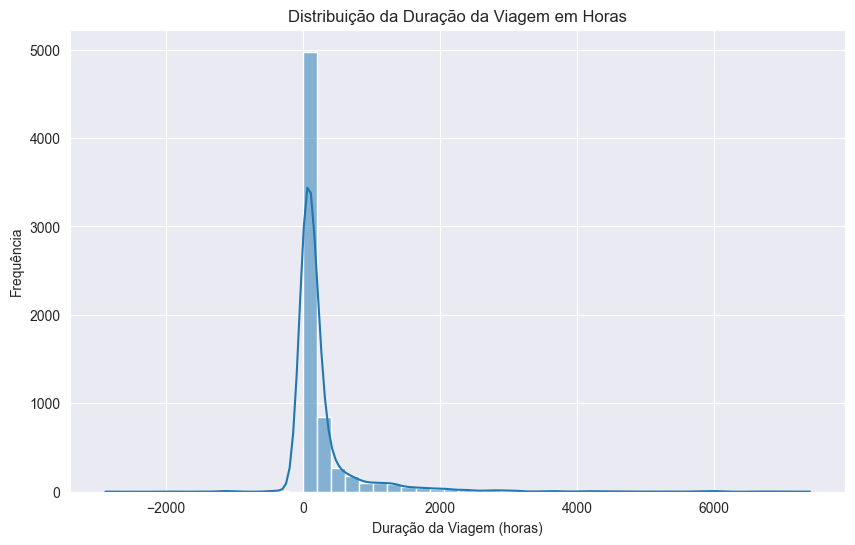

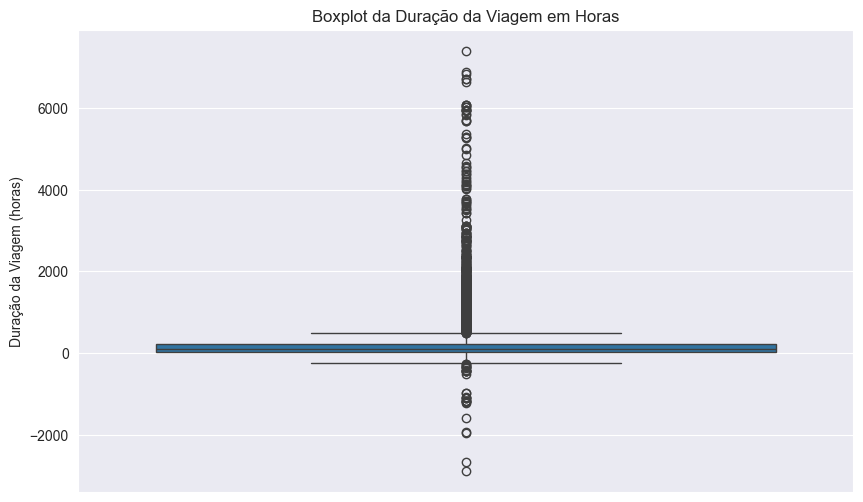

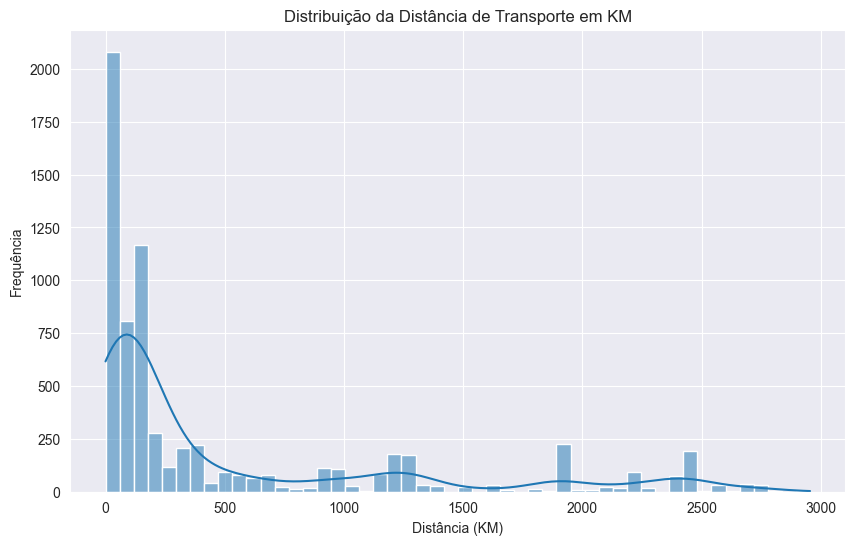

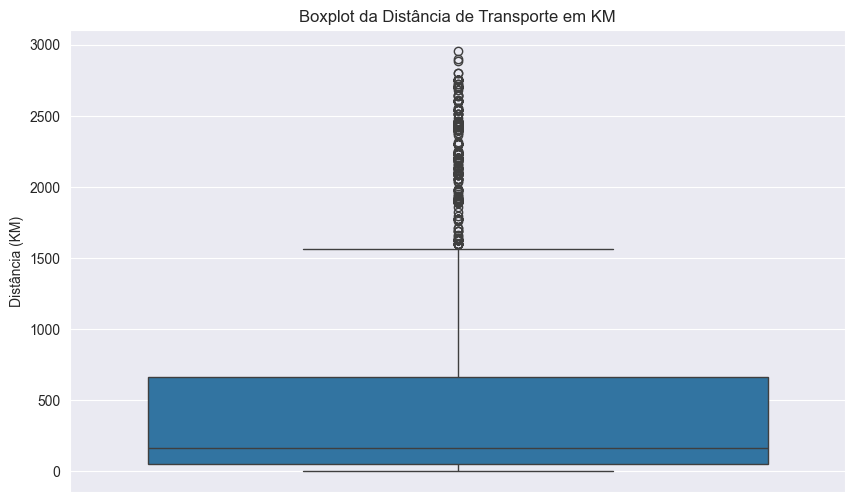

Número de outliers na duração da viagem: 901
Exemplo de outliers na duração da viagem:
         BookingID  trip_duration_hours  TRANSPORTATION_DISTANCE_IN_KM
1086  AEIBK2022716           860.913863                         1000.0
1216  AEIBK2023415           633.667401                         1900.0
1358  AEIBK2021224          1244.548892                         1199.0
1359  AEIBK2021709          1098.553873                         1330.0
1360  AEIBK2020139          1619.423786                         2230.0


In [113]:

# Distribuição da variável 'trip_duration_hours'
plt.figure(figsize=(10, 6))
sns.histplot(df['trip_duration_hours'], bins=50, kde=True)
plt.title('Distribuição da Duração da Viagem em Horas')
plt.xlabel('Duração da Viagem (horas)')
plt.ylabel('Frequência')
plt.show()

# Boxplot para identificar outliers na duração da viagem
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['trip_duration_hours'])
plt.title('Boxplot da Duração da Viagem em Horas')
plt.ylabel('Duração da Viagem (horas)')
plt.show()

# Análise da distribuição da variável 'TRANSPORTATION_DISTANCE_IN_KM'
plt.figure(figsize=(10, 6))
sns.histplot(df['TRANSPORTATION_DISTANCE_IN_KM'], bins=50, kde=True)
plt.title('Distribuição da Distância de Transporte em KM')
plt.xlabel('Distância (KM)')
plt.ylabel('Frequência')
plt.show()

# Boxplot para identificar outliers na distância de transporte
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['TRANSPORTATION_DISTANCE_IN_KM'])
plt.title('Boxplot da Distância de Transporte em KM')
plt.ylabel('Distância (KM)')
plt.show()

# Identificação de Outliers (exemplo usando IQR para trip_duration_hours)
Q1 = df['trip_duration_hours'].quantile(0.25)
Q3 = df['trip_duration_hours'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_duration = df[(df['trip_duration_hours'] < lower_bound) | (df['trip_duration_hours'] > upper_bound)]
print(f'Número de outliers na duração da viagem: {len(outliers_duration)}')
print('Exemplo de outliers na duração da viagem:')
print(outliers_duration[['BookingID', 'trip_duration_hours', 'TRANSPORTATION_DISTANCE_IN_KM']].head())

### 3.3. Análise de Correlações
Vamos investigar as correlações entre as variáveis numéricas para entender como elas se relacionam.

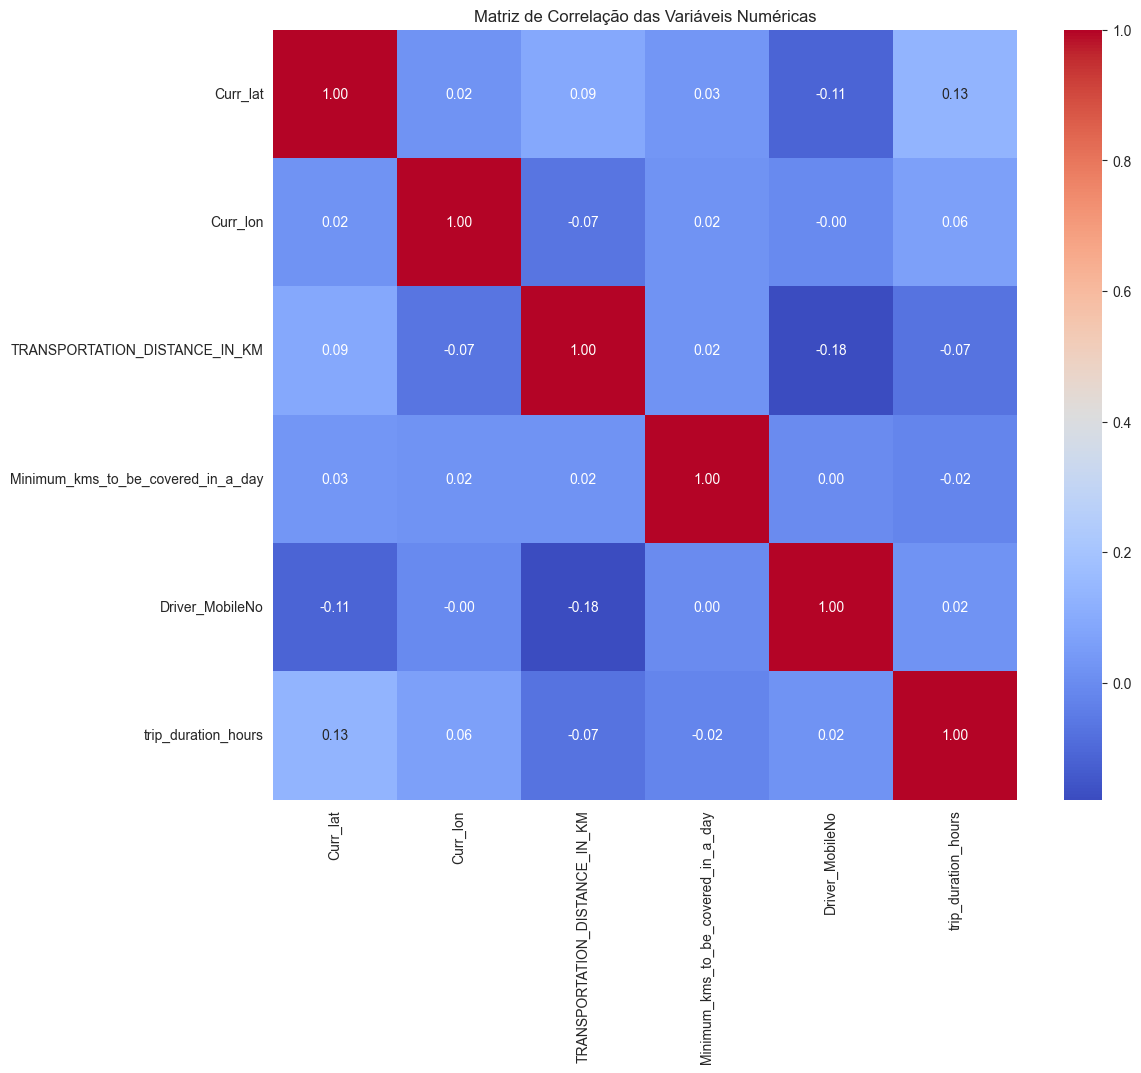

Matriz de Correlação:
                                    Curr_lat  Curr_lon  \
Curr_lat                            1.000000  0.020084   
Curr_lon                            0.020084  1.000000   
TRANSPORTATION_DISTANCE_IN_KM       0.092215 -0.068425   
Minimum_kms_to_be_covered_in_a_day  0.032663  0.022609   
Driver_MobileNo                    -0.113427 -0.004231   
trip_duration_hours                 0.134056  0.063126   

                                    TRANSPORTATION_DISTANCE_IN_KM  \
Curr_lat                                                 0.092215   
Curr_lon                                                -0.068425   
TRANSPORTATION_DISTANCE_IN_KM                            1.000000   
Minimum_kms_to_be_covered_in_a_day                       0.020730   
Driver_MobileNo                                         -0.179005   
trip_duration_hours                                     -0.072300   

                                    Minimum_kms_to_be_covered_in_a_day  \
Curr_lat     

In [114]:
# Calcular a matriz de correlação para variáveis numéricas
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = df[numeric_cols].corr()

# Exibir a matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

print('Matriz de Correlação:')
print(correlation_matrix)

## 4. Visualizações

### 4.1. Distribuição de Entregas no Prazo vs. Atrasadas (Matplotlib/Seaborn)
Este gráfico de barras mostra a proporção de entregas que foram realizadas no prazo (G) versus as que foram atrasadas (R). É crucial para entender a eficiência geral das operações de logística.

ontime
G    2548
Name: count, dtype: int64
delay
R    4342
Name: count, dtype: int64


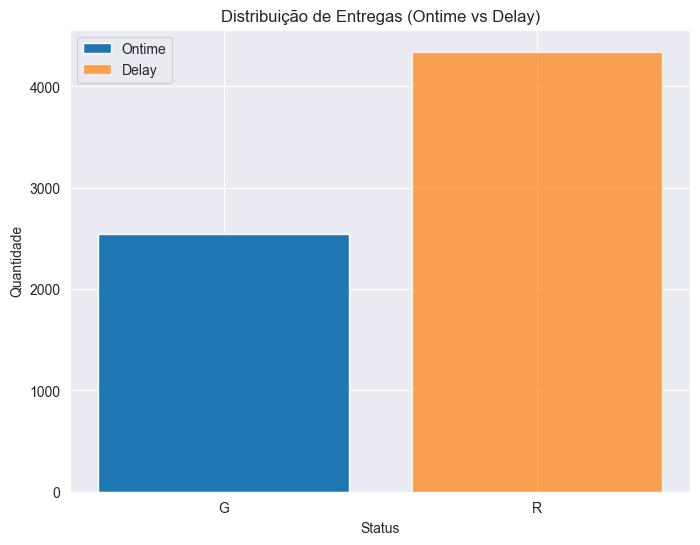

In [120]:
delivery_status_ontime = df['ontime'].value_counts()
delivery_status_delay = df['delay'].value_counts()

print(delivery_status_ontime)
print(delivery_status_delay)

plt.figure(figsize=(8,6))

plt.bar(delivery_status_ontime.index.astype(str), delivery_status_ontime.values, label="Ontime")
plt.bar(delivery_status_delay.index.astype(str), delivery_status_delay.values, label="Delay", alpha=0.7)

plt.title("Distribuição de Entregas (Ontime vs Delay)")
plt.xlabel("Status")
plt.ylabel("Quantidade")
plt.legend()
plt.show()


### 4.2. Distribuição da Duração da Viagem (Seaborn)
Um histograma com KDE (Kernel Density Estimate) para a duração da viagem em horas nos permite visualizar a forma da distribuição, identificar picos e a dispersão dos dados. Isso ajuda a entender o tempo típico de viagem e a presença de viagens excepcionalmente longas ou curtas.

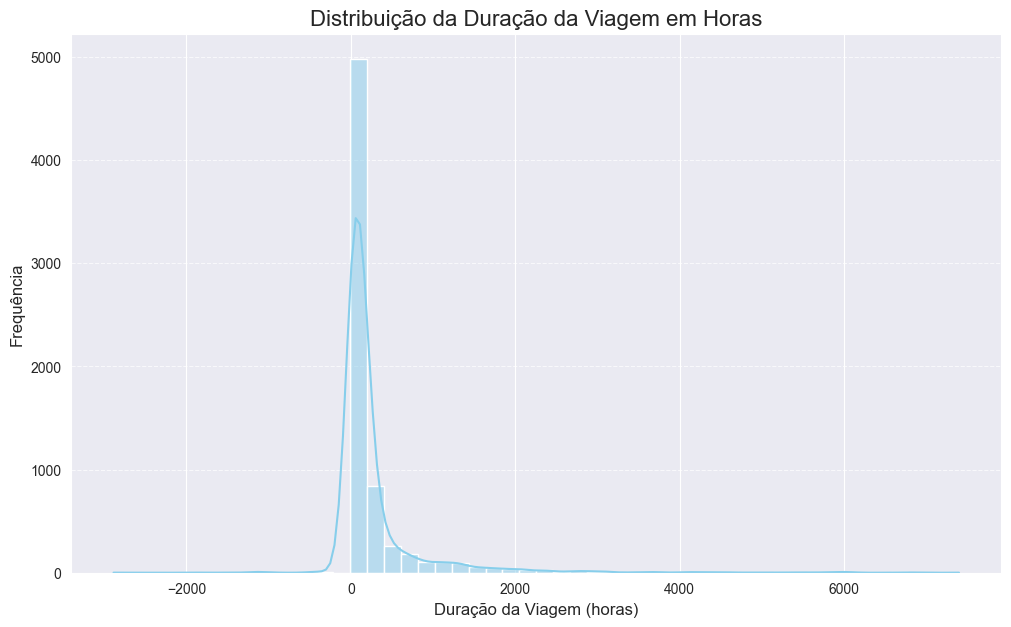

In [100]:
plt.figure(figsize=(12, 7))
sns.histplot(df['trip_duration_hours'], bins=50, kde=True, color='skyblue')
plt.title('Distribuição da Duração da Viagem em Horas', fontsize=16)
plt.xlabel('Duração da Viagem (horas)' , fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 4.3. Boxplot da Duração da Viagem para Identificação de Outliers (Matplotlib/Seaborn)
O boxplot é uma ferramenta eficaz para visualizar a mediana, quartis e identificar outliers na duração da viagem. Outliers podem indicar viagens com problemas, erros de registro ou eventos incomuns que merecem investigação.

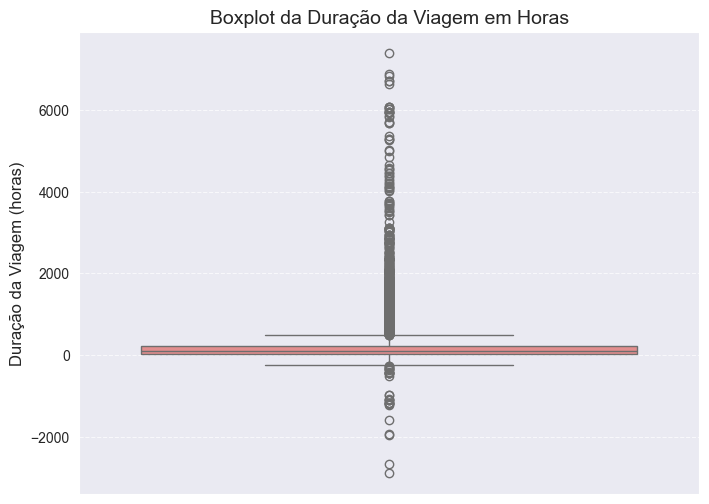

In [101]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['trip_duration_hours'], color='lightcoral')
plt.title('Boxplot da Duração da Viagem em Horas', fontsize=14)
plt.ylabel('Duração da Viagem (horas)' , fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 4.4. Matriz de Correlação Interativa (Plotly)
Um mapa de calor interativo da matriz de correlação permite explorar a relação entre todas as variáveis numéricas. Cores mais quentes indicam correlação positiva forte, enquanto cores mais frias indicam correlação negativa forte. A interatividade do Plotly permite inspecionar os valores exatos das correlações ao passar o mouse.

In [102]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = df[numeric_cols].corr()

fig = px.imshow(correlation_matrix, text_auto=True, aspect='auto',
                title='Matriz de Correlação das Variáveis Numéricas',
                color_continuous_scale='RdBu_r')
fig.update_layout(title_font_size=16)
fig.show()

### 4.5. Relação entre Distância e Duração da Viagem (Seaborn)
Um gráfico de dispersão entre a distância de transporte e a duração da viagem pode revelar se há uma relação linear entre essas duas variáveis. A cor pode ser usada para diferenciar entregas no prazo e atrasadas, adicionando uma camada de insight sobre como a distância afeta a pontualidade.

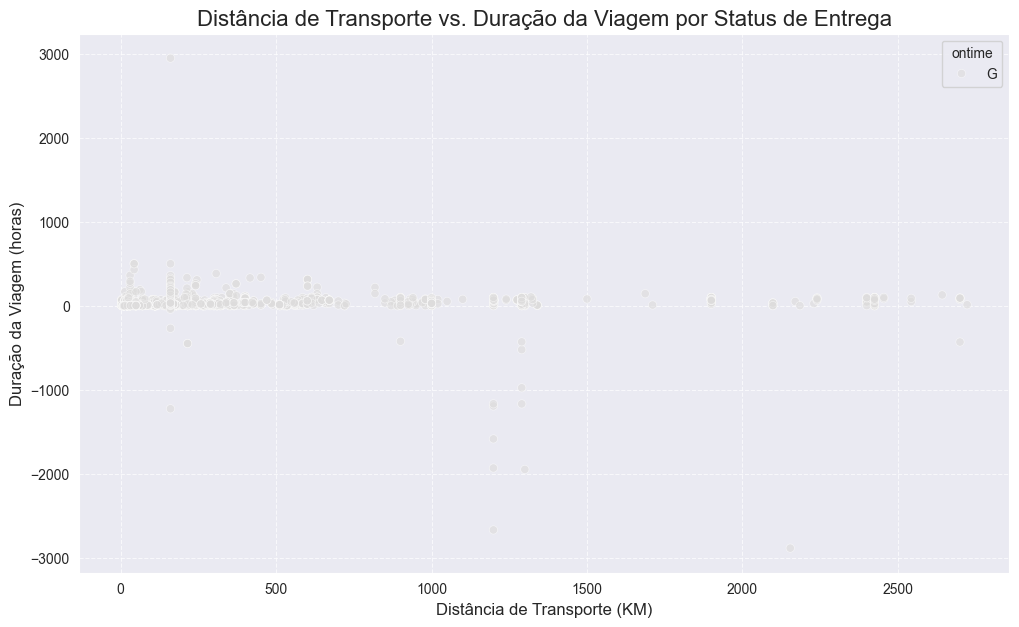

In [103]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='TRANSPORTATION_DISTANCE_IN_KM', y='trip_duration_hours', hue='ontime', data=df, alpha=0.6, palette='coolwarm')
plt.title('Distância de Transporte vs. Duração da Viagem por Status de Entrega', fontsize=16)
plt.xlabel('Distância de Transporte (KM)' , fontsize=12)
plt.ylabel('Duração da Viagem (horas)' , fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

## 5. Conclusão
Esta análise exploratória forneceu insights valiosos sobre os dados de logística. Identificamos a distribuição das entregas no prazo e atrasadas, a duração típica das viagens e a presença de outliers. A correlação entre distância e duração da viagem foi explorada, e visualizações interativas foram criadas para facilitar a compreensão dos dados.

### Principais Descobertas:
- A maioria das entregas está no prazo, mas uma parcela significativa sofre atrasos, indicando uma área para otimização.
- A duração das viagens e as distâncias percorridas variam amplamente, com alguns outliers que podem representar rotas incomuns ou problemas específicos.
- Existe uma correlação positiva entre a distância de transporte e a duração da viagem, como esperado, mas a análise detalhada pode revelar ineficiências em certas rotas ou tipos de veículos.

### Sugestões para Análises Futuras:
- Investigar os fatores que contribuem para os atrasos nas entregas (e.g., tipo de veículo, rota, condições climáticas, horário de pico).
- Realizar uma análise mais aprofundada dos outliers para entender suas causas e se devem ser tratados de forma diferente.
- Desenvolver um modelo preditivo para estimar a duração da viagem e a probabilidade de atraso, utilizando variáveis como tipo de veículo, distância, origem e destino.
- Analisar o impacto de diferentes provedores de GPS e fornecedores na eficiência das entregas.

# 6. Modelo Preditivo

O modelo preditivo será desenvolvido para prever caso uma viagem atrase ou não, utilizando as colunas delay e ontime como variáveis alvo.
Transformaremos elas em variáveis binárias, onde 1 representa atraso e 0 representa no prazo com nome de TARGET.
Faremos o tratamento necessário e apresentaremos o melhor modelo utilizado.

### 6.1. retirada de colunas desnecessárias

In [104]:
colunas_desnecessarias = [
    # Identificador único, não traz informação útil para prever atrasos
    "BookingID",

    # Data/hora bruta do agendamento. Melhor extrair variáveis derivadas (mês, dia da semana, hora)
    "BookingID_Date",

    # Placa do veículo, informação única que não generaliza (melhor usar vehicleType)
    "vehicle_no",

    # Nome do motorista: dado pessoal + não generaliza para outros
    "Driver_Name",

    # Telefone do motorista: dado pessoal e irrelevante para atrasos
    "Driver_MobileNo",

    # Identificador do cliente: é apenas um código
    "customerID",

    # Nome/código do cliente: pode enviesar o modelo, não generaliza (a não ser que queira analisar clientes específicos)
    "customerNameCode",

    # Identificador do fornecedor: apenas um código
    "supplierID",

    # Nome/código do fornecedor: pode enviesar, só faz sentido em análise de fornecedor
    "supplierNameCode",

    # Código da localização de origem (redundante, já temos latitude/longitude)
    "OriginLocation_Code",

    # Código da localização de destino (redundante, já temos latitude/longitude)
    "DestinationLocation_Code",

    # Data/hora de ping do GPS: só se sabe durante a viagem, não pode ser usado na previsão antes de sair
    "Data_Ping_time",

    # ETA real: só se sabe após a viagem (causa vazamento de dados)
    "actual_eta",

    # Data de término da viagem: informação conhecida apenas após a entrega (vazamento de dados)
    "trip_end_date",
    #Ambas já foram usadas para classificar o target
    "delay",
    "ontime"
]

df = df.drop(columns=[c for c in colunas_desnecessarias if c in df.columns])
df

,GpsProvider,Market/Regular,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Planned_ETA,Current_Location,DestinationLocation,Curr_lat,Curr_lon,trip_start_date,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Minimum_kms_to_be_covered_in_a_day,Material Shipped,trip_duration_hours
0,CONSENT TRACK,Market,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA","13.1550,80.1960","12.7400,77.8200",2020-08-21 18:59:01.000,"Vaniyambadi Rd, Valayambattu, Tamil Nadu 63575...","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA",12.663500,78.649870,2020-08-17 14:59:01,320.0,32 FT Single-Axle 7MT - HCV,250.0,BRACKET / GRAB HANDLE,263.650958
1,VAMOSYS,Regular,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-31 20:22:22.827,"Unnamed Road, Oragadam Industrial Corridor, Va...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...",12.836757,79.954428,2020-08-27 16:21:52,103.0,32 FT Multi-Axle 14MT - HCV,250.0,ZB MODEL PLATE / 3143,20.406946
2,CONSENT TRACK,Regular,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8710,79.7390","11.8710,79.7390",2020-08-31 21:59:24.987,"570, National Hwy 48, Shenoy Nagar, Chennai, T...","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY",13.073956,80.225780,2020-08-27 17:57:04,300.0,1 MT Tata Ace (Open Body),250.0,LETTERING / FUSO,22.107443
3,VAMOSYS,Regular,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-09-01 04:48:24.503,"Singaperumal Koil - Sriperumbudur Rd, Oragadam...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...",12.836686,79.950560,2020-08-28 00:47:45,61.0,32 FT Multi-Axle 14MT - HCV,250.0,LU STRUT RA / RADIUS ROD,12.045277
4,VAMOSYS,Regular,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8720,79.6320","11.8720,79.6320",2020-09-01 05:23:19.243,"Melmaruvathur, Tamil Nadu 603319, India","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY",12.429501,79.831556,2020-08-28 01:13:48,240.0,32 FT Multi-Axle 14MT - HCV,250.0,WISHBONE / V ROD/HDT,13.150591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6875,JTECH,Regular,"Ramamurthy Nagar, Bangalore, Karnataka","Sahakaranagar P.O, Bangalore, Karnataka","13.007503209603689,77.665098855934886","13.068901840235711,77.590655738806618",2019-03-27 18:31:00.000,"SGT Goods Shed Rd, Kadugodi, Bengaluru, Karnat...","Sahakaranagar P.O, Bangalore, Karnataka",12.996370,77.740616,2019-03-27 18:00:00,12.0,25 FT Open Body 21MT,250.0,TOOL KIT SET,-0.233333
6876,JTECH,Regular,"Ramamurthy Nagar, Bangalore, Karnataka","Bangalore International Airport, Bangalore, Ka...","13.007503209603689,77.665098855934886","13.196312912801169,77.708156925688726",2019-03-31 20:36:00.000,"Shed No 60, Medahalli Kadugodi Road, Virgonaga...","Bangalore International Airport, Bangalore, Ka...",13.024788,77.722391,2019-03-31 17:30:00,31.0,40 FT 3XL Trailer 35MT,250.0,CONTROL LEVER ASSY,2.350000
6877,JTECH,Regular,"Mugabala, Bangalore Rural, Karnataka","Anekal, Bangalore, Karnataka","16.560192249175344,80.792293091599547","12.722686,77.676518",2019-03-30 01:38:00.000,"Shed No 60, Medahalli Kadugodi Road, Virgonaga...","Anekal, Bangalore, Karnataka",13.024788,77.722391,2019-03-29 20:44:00,49.0,40 FT 3XL Trailer 35MT,250.0,SPARE PARTS AUTOMOBILE,4.150000
6878,JTECH,Regular,"Mugabala, Bangalore Rural, Karnataka","Anekal, Bangalore, Karnataka","16.560192249175344,80.792293091599547","12.896896847817695,77.712223056874862",2019-03-27 17:20:00.000,"Shed No 60, Medahalli Kadugodi Road, Virgonaga...","Anekal, Bangalore, Karnataka",13.024747,77.721823,2019-03-27 15:29:00,49.0,40 FT 3XL Trailer 35MT,250.0,SPARE PARTS AUTOMOBILE,1.100000
